In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('car_age_price (1).csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


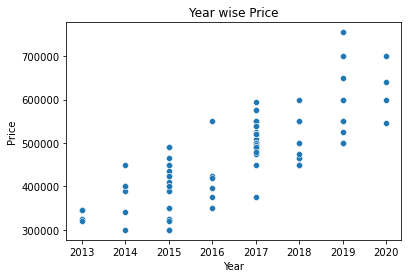

In [7]:
# Linear relationship between Year and Price

sns.scatterplot(x = "Year", y = "Price",data = data)
plt.title("Year wise Price")
plt.show()

In [8]:
data.corr() 

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


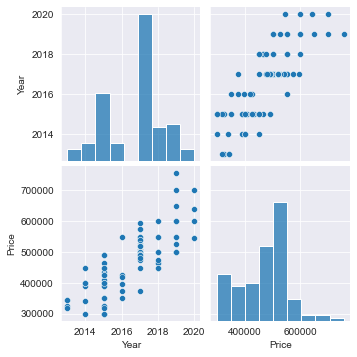

In [9]:
# Visualizing the linear model

sns.set_style('darkgrid')
sns.pairplot(data)

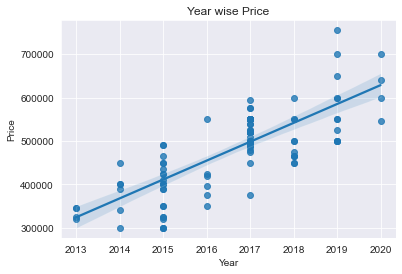

In [10]:
sns.regplot(x = "Year", y = "Price", data = data)
plt.title("Year wise Price")
plt.show()

In [11]:
X = data['Year']
y = data['Price']

In [12]:
# Reshaping the given data to our expected format to feed into the model

X = data['Year'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

In [16]:
# Dividing the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train',X_train)
print('y_train is',y_train)

X_train [[2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2013]
 [2016]
 [2017]
 [2018]
 [2017]
 [2017]
 [2017]
 [2015]
 [2017]
 [2017]
 [2019]
 [2015]
 [2020]
 [2020]
 [2018]
 [2017]
 [2013]
 [2020]
 [2017]
 [2015]
 [2015]
 [2015]
 [2020]
 [2015]
 [2015]
 [2018]
 [2017]
 [2018]
 [2014]
 [2015]
 [2016]
 [2015]
 [2017]
 [2017]
 [2019]
 [2016]
 [2015]
 [2019]
 [2017]
 [2017]
 [2017]
 [2014]
 [2018]
 [2015]
 [2015]
 [2017]
 [2016]
 [2016]
 [2018]
 [2017]
 [2017]
 [2017]
 [2015]
 [2015]
 [2019]
 [2017]
 [2016]
 [2019]
 [2015]
 [2017]
 [2017]
 [2014]
 [2015]
 [2015]
 [2015]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2019]
 [2015]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]]
y_train is [[495000]
 [525000]
 [509999]
 [520000]
 [520000]
 [345000]
 [425000]
 [550000]
 [475000]
 [550000]
 [520000]
 [375000]
 [390000]
 [550000]
 [540000]
 [500000]
 [300000]
 [700000]
 [545000]
 [465000]
 [550000]
 [345000]
 [600000]
 [550000]
 [325000]
 [400000]
 [465000]
 [640000]
 [350000]
 [425000]
 [450000

In [17]:
# Linear regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [18]:
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting the possible price of a 2022 model second-hand grand i10?

In [20]:
pred = regressor.predict([[2022]])
print('The possible price of a 2022 model second-hand grand i10 will be', pred)

The possible price of a 2022 model second-hand grand i10 will be [[716914.80945329]]


In [21]:
y_pred = regressor.predict(X_test)

In [22]:
# Mean squared error

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('The MSE for this model prediction is', mse)

The MSE for this model prediction is 3627589887.146531


In [24]:
# R squared value

In [25]:
from sklearn.metrics import r2_score
r_sqr = r2_score(y_test, y_pred)
print('The R squared value for the model is',r_sqr)  

The R squared value for the model is 0.6303765762732791


In [26]:
# Lasso Regression Model

In [27]:
from sklearn.linear_model import Lasso

In [28]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)
print('The R squared value for the model is',r2_score)
mse = mean_squared_error(y_test, y_pred)
print('The MSE for this model prediction is', mse)

The R squared value for the model is <function r2_score at 0x0000029C5B1AC040>
The MSE for this model prediction is 3627587967.65232


When compared to linear regression model the R squared value for Lasso regression is decreased in very small amount and the mean squared error is increased. So in this case Linear regression is performing better.